In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from skimage.transform import resize
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
import pickle
import os

directory = 'pkl_objects'

In [2]:
x_aug_train_to_one = pd.read_feather('data_train_aug_to_one.feather').iloc[:, 1:].to_numpy()
y_aug_train = pd.read_feather('data_train_aug_to_one.feather').iloc[:, 0].to_numpy().astype(np.int8)

x_test_to_one = pd.read_feather('data_test_to_one.feather').iloc[:, 1:].to_numpy()
y_test = pd.read_feather('data_test_to_one.feather').iloc[:, 0].to_numpy().astype(np.int8)

In [3]:
y_aug_train

array([5, 0, 4, ..., 5, 6, 8], dtype=int8)

In [4]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int8)

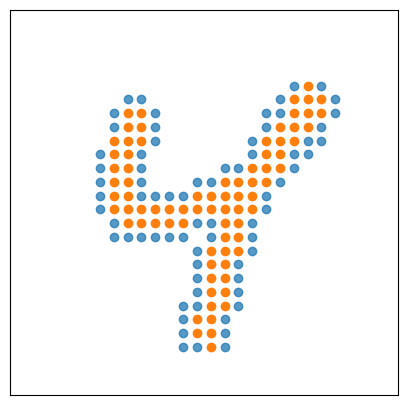

In [5]:
arr = x_aug_train_to_one[1008].reshape(28, 28)
indices_point75 = np.argwhere(arr == 0.75)
indices_1 = np.argwhere(arr == 1)

x_grid, y_grid = np.meshgrid(np.arange(arr.shape[1]), np.arange(arr.shape[0]))

plt.figure(figsize=(5, 5))
plt.scatter(x_grid, y_grid, c='white', marker='s', alpha=0)
plt.scatter(indices_point75[:, 1], 28 - indices_point75[:, 0], marker='o', alpha=0.75)
plt.scatter(indices_1[:, 1], 28 - indices_1[:, 0], marker='o', alpha=1)
plt.xlim(-0.5, arr.shape[1] - 0.5)
plt.ylim(-0.5, arr.shape[0] - 0.5)
plt.xticks([])
plt.yticks([])
plt.show()

<h3><b>Training Random Forest using the augmented dataset</b></h3>

In [6]:
rf = RandomForestClassifier(n_estimators=200,
                            bootstrap=True,
                            # max_samples=0.75,
                            # max_features=0.5,
                            n_jobs=-1,
                            random_state=3)

rf.fit(x_aug_train_to_one, y_aug_train)

RandomForestClassifier(max_features=0.5, max_samples=0.75, n_estimators=200,
                       n_jobs=-1, random_state=3)

In [43]:
# path = os.path.join(directory, 'rf_aug_best.pkl')

# with open(path, 'wb') as file:
#     pickle.dump(rf, file)

In [7]:
print(rf.score(x_aug_train_to_one, y_aug_train))
print(rf.score(x_test_to_one, y_test))

0.9999816666666667
0.9731


<h3><b>Training Histogram Gradient Boosting Classifier using the augmented dataset</b></h3>

In [41]:
gbc = HistGradientBoostingClassifier(loss='log_loss',
                                    learning_rate=0.2,
                                    max_iter=300,
                                    early_stopping=True,
                                    random_state=3)

gbc.fit(x_aug_train_to_one, y_aug_train)

HistGradientBoostingClassifier(early_stopping=True, learning_rate=0.2,
                               max_iter=300, random_state=3)

In [44]:
# path = os.path.join(directory, 'gbc_aug_best.pkl')

# with open(path, 'wb') as file:
#     pickle.dump(gbc, file)

In [42]:
print(gbc.score(x_aug_train_to_one, y_aug_train))
print(gbc.score(x_test_to_one, y_test))

0.9411783333333333
0.9671
